<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Mnist_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# **Understanding the image data format**

In [4]:
X_train[0].shape

(28, 28)

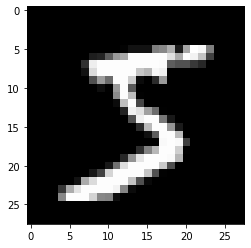

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

# **Preprocessing the image data**


In [7]:
height, width = 28, 28

In [8]:
X_train = X_train.reshape(60000, height,width,1)
X_test = X_test.reshape(10000, height,width,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train /= 255.0
X_test /= 255.0


In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [13]:
batch_size = 128
num_classes = 10
epochs = 20

#X_train = X_train.reshape(60000,28,28,1)
#X_test = X_test.reshape(10000,28,28,1)
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255.0
#X_test /= 255.0
#y_train = to_categorical(y_train, num_classes)
#y_test = to_categorical(y_test, num_classes)



In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [15]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

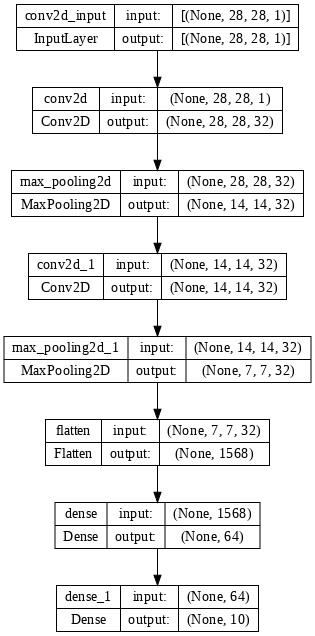

In [17]:
plot_model(model=cnn, dpi=72, show_shapes=True)

In [18]:
history_cnn = cnn.fit(X_train, y_train, epochs=epochs, verbose=1, validation_data=(X_train, y_train))

Epoch 1/20
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1558 - accuracy: 0.9514 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 2/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0542 - val_accuracy: 0.9821
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0237 - val_accuracy: 0.9926
Epoch 4/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0151 - val_accuracy: 0.9951
Epoch 5/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0102 - val_accuracy: 0.9973
Epoch 6/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0122 - val_accuracy: 0.9964
Epoch 7/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0090 -

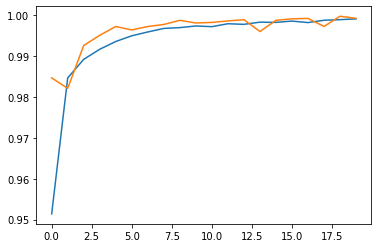

In [19]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

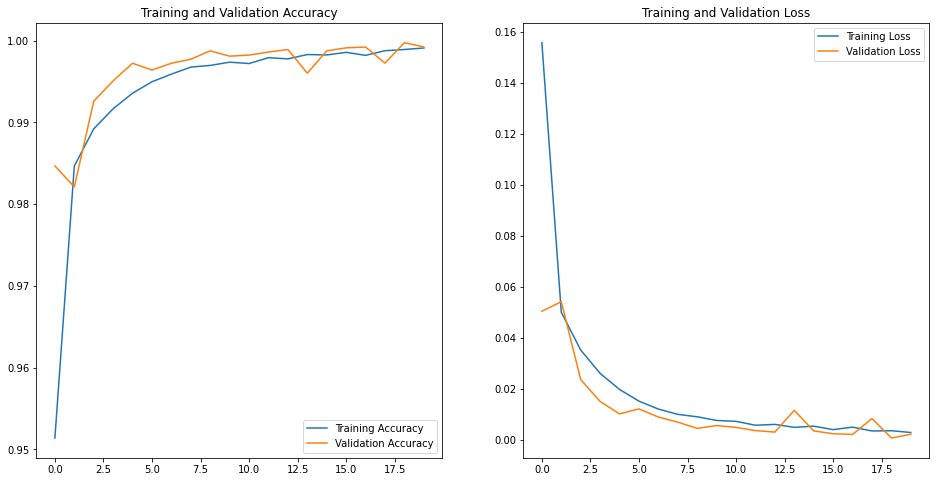

In [20]:
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
     

In [22]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.0521 - accuracy: 0.9909


In [23]:
score

[0.05205901339650154, 0.9908999800682068]

In [ ]:
##cnn.load_weights('weights/cnn-model5.h5')